##Mount Drive and Read CSV

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")  

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load the dataset
aisles=pd.read_csv("/content/gdrive/My Drive/datasets/aisles.csv")
departments=pd.read_csv("/content/gdrive/My Drive/datasets/departments.csv")
products=pd.read_csv("/content/gdrive/My Drive/datasets/products.csv")
orders=pd.read_csv("/content/gdrive/My Drive/datasets/orders.csv")
order_products_prior = pd.read_csv("/content/gdrive/My Drive/datasets/order_products__prior.csv")
order_products_train = pd.read_csv("/content/gdrive/My Drive/datasets/order_products__train.csv")

##Null Values

### Aisles

In [ ]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
aisles.shape

(134, 2)

In [ ]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

###Departments

In [ ]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

###Products

In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
products.value_counts().sum()

49688

###Orders

In [ ]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0.0)

In [ ]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


###Order Products Prior

In [ ]:
ord_prod_prior = pd.read_csv("/content/gdrive/My Drive/datasets/order_products__prior.csv")

In [ ]:
ord_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
ord_prod_prior.shape

(32434489, 4)

In [ ]:
ord_prod_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

##EDA 

###EDA orders


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,5)})

Text(0.5, 0, 'Day')

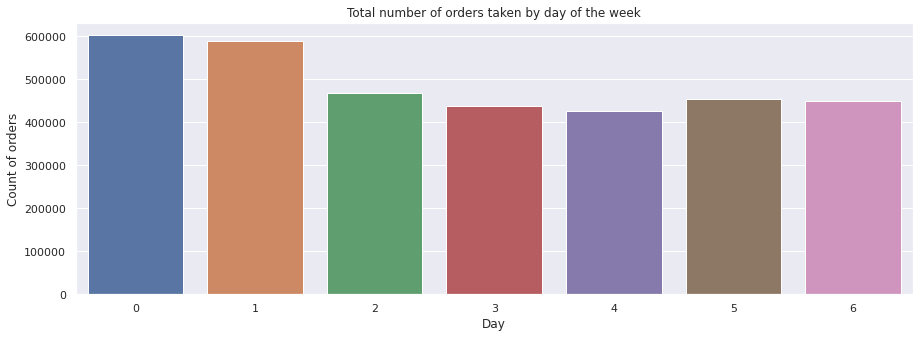

In [ ]:
sns.countplot(x='order_dow', data=orders)
plt.title("Total number of orders taken by day of the week")
plt.ylabel("Count of orders")
plt.xlabel("Day")

0 is the start of the week that is Sunday. 
 
As we can see from the bar graph most orders have been placed on Sundays and Mondays as those are the start of the weeks which makes sense because people place instacart orders weekly and run out of groceriers by the end of the week.

Text(0.5, 0, 'Hour of the day')

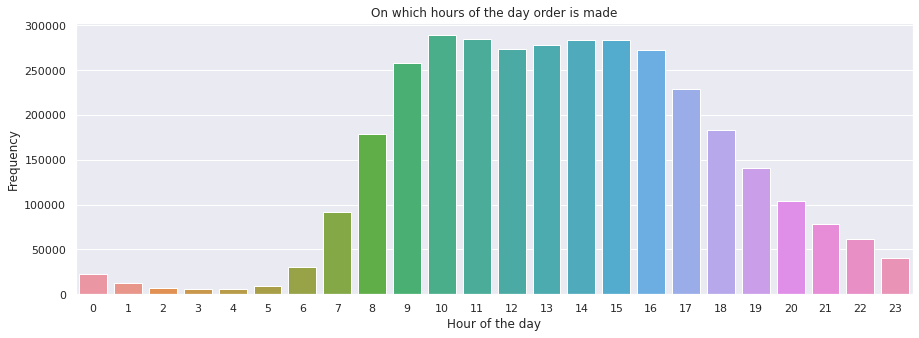

In [ ]:
sns.countplot(x='order_hour_of_day', data=orders)
plt.title("On which hours of the day order is made")
plt.ylabel("Frequency")
plt.xlabel("Hour of the day")

From this graph we can see that most of the orders places during the day are placed between 9am to 4pm.

In [ ]:
dow_hod = orders.groupby(['order_hour_of_day', 'order_dow'])['order_number'].aggregate('count').reset_index()

In [ ]:
dow_hod1 = dow_hod.pivot('order_hour_of_day','order_dow','order_number')

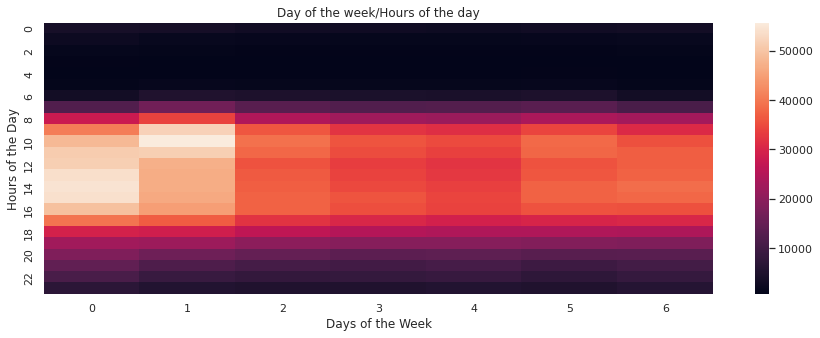

In [ ]:
sns.heatmap(dow_hod1)
plt.title("Day of the week/Hours of the day")
plt.xlabel("Days of the Week")
plt.ylabel("Hours of the Day")
plt.show()

The heatmap combines Hours of the day and Days of the week.
Thsi is very useful because we can infer that most people place their orders on Sunday afternoons and Monday mornings so that they have their groceries stocked up for the week.  

Text(0.5, 0, 'Day since prior order')

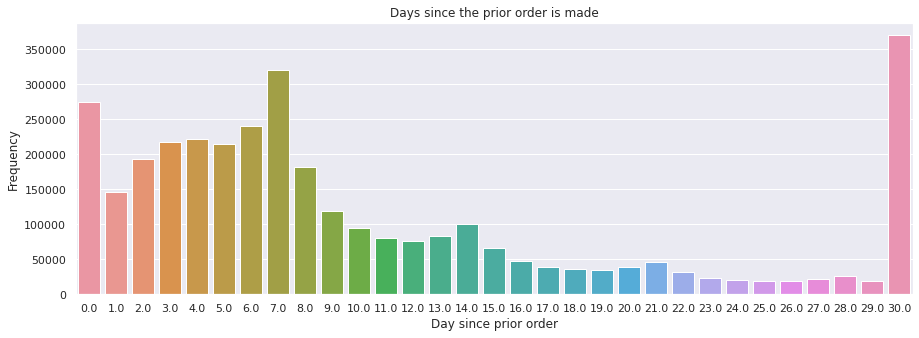

In [ ]:
sns.countplot(x='days_since_prior_order', data=orders)
plt.title("Days since the prior order is made")
plt.ylabel("Frequency")
plt.xlabel("Day since prior order")

This is the bar graph that tells us about the days since the prior order is made. 
0 is the day of the first order. 
We can see that the bars spike at day 7 and day 30, which means that customers tend to order groceries and stuff they need from instacart weekly and monthly.

###Merge Dataframes for rest of EDA

In [ ]:
merged_prior = pd.merge(ord_prod_prior, products, on = 'product_id', how = 'left')
merged_prior = pd.merge(merged_prior, aisles, on = 'aisle_id', how = 'left')
merged_prior = pd.merge(merged_prior, departments, on = 'department_id', how='left')

merged_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [ ]:
merged_prior_with_orders = pd.merge(merged_prior, orders, on='order_id')

In [ ]:
merged_prior_with_orders.groupby(['user_id', 'product_id', 'order_id'])

In [ ]:
#cols = ["order_id", "product_id", "add_to_cart_order", "reordered", "product_name", "aisle_id", "department_id", "aisle", "department", "user_id", "eval_set", "order_number", "order_dow", "order_hour_of_day", "days_since_prior_order"]

In [ ]:
merged_prior_with_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,prior,16,5,17,12.0


### EDA departments

In [ ]:
dep_val_counts = merged_prior.department.value_counts()

In [ ]:
dep_val_counts.head()

produce       9479291
dairy eggs    5414016
snacks        2887550
beverages     2690129
frozen        2236432
Name: department, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x432 with 0 Axes>

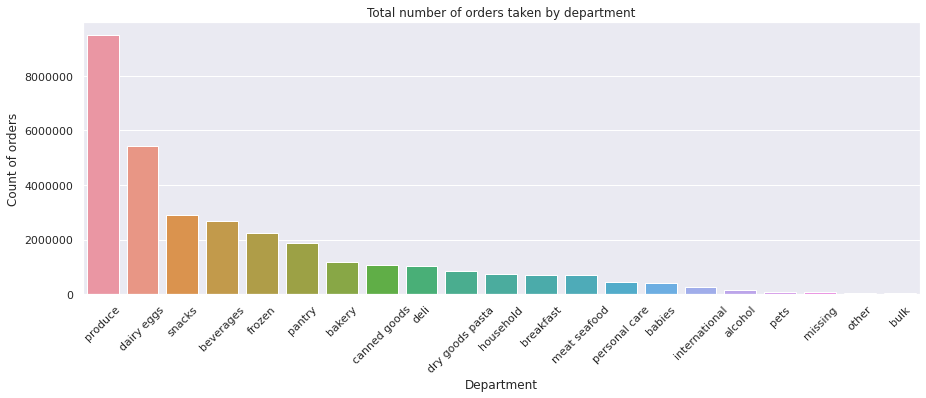

<Figure size 1008x432 with 0 Axes>

In [ ]:
sns.barplot(dep_val_counts.index, dep_val_counts.values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Total number of orders taken by department")
plt.ylabel("Count of orders")
plt.xlabel("Department")
plt.xticks(rotation = 45)
plt.figure(figsize = (14,6))

From the department graph above we can see how many orders are being placed per each department. We can see that produce is by far the most ordered item, while diary/eggs, snacks, and beverages come next.

Pie Chart Below

In [ ]:
dept_fre_count = merged_prior.department.value_counts()
dept_percentage = np.array(dept_fre_count/ dept_fre_count.sum())*100
dept_name = np.array(dept_fre_count.index)

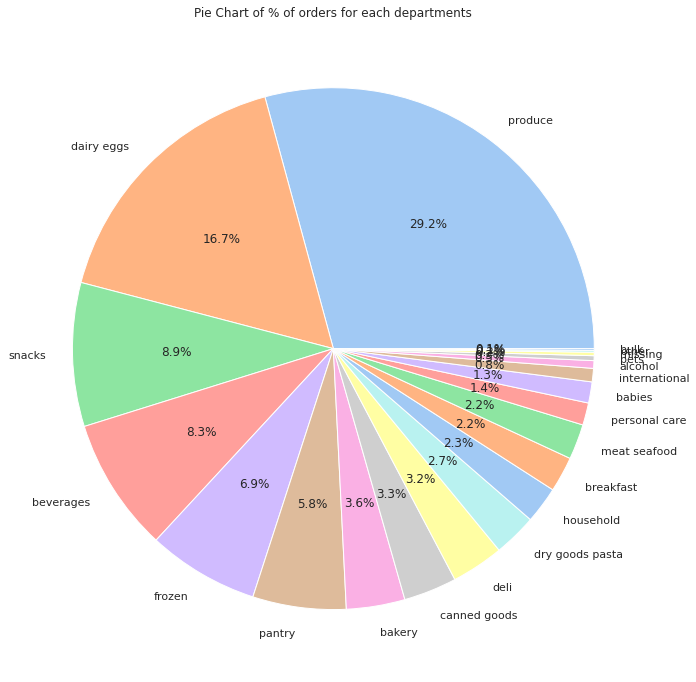

In [ ]:
plt.figure(figsize = (12,12))
palette_color = sns.color_palette('pastel')
plt.pie(dept_percentage, labels = dept_name, autopct = '%1.1f%%', colors=palette_color)
plt.title('Pie Chart of % of orders for each departments')
plt.show()

### EDA Aisles

In [ ]:
aisle_val_counts = merged_prior.aisle.value_counts()[:10]

In [ ]:
aisle_val_counts.head()

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
Name: aisle, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

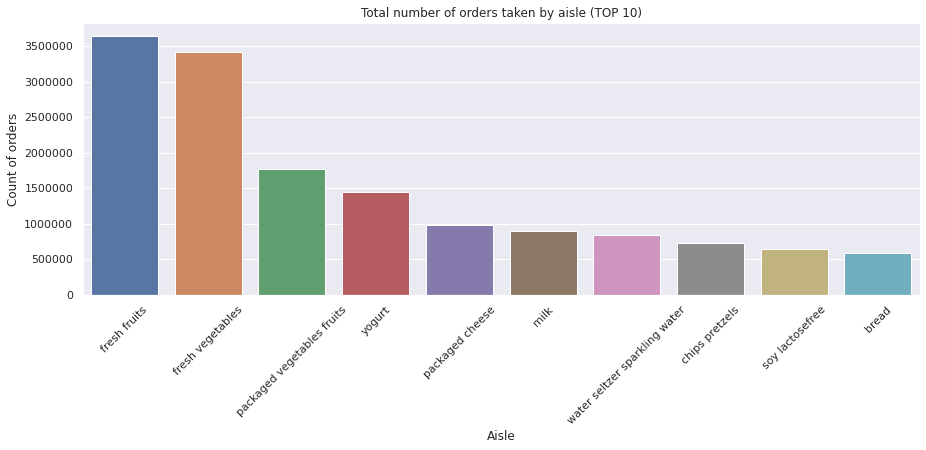

In [ ]:
sns.barplot(aisle_val_counts.index, aisle_val_counts.values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Total number of orders taken by aisle (TOP 10)")
plt.ylabel("Count of orders")
plt.xlabel("Aisle")
plt.xticks(rotation = 45)

The aisle graph shows us the top 10 aisles that people order from. We can see that fruits and vegetables are by far the most commonly ordered items. This may be because of how quickly fresh products spoil or go bad, meaning that customers have to order them more often.

###EDA Products


In [ ]:
product_val_counts = merged_prior.product_name.value_counts()[:15]

In [ ]:
product_val_counts.head()

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_name, dtype: int64

Text(0, 0.5, 'Product')

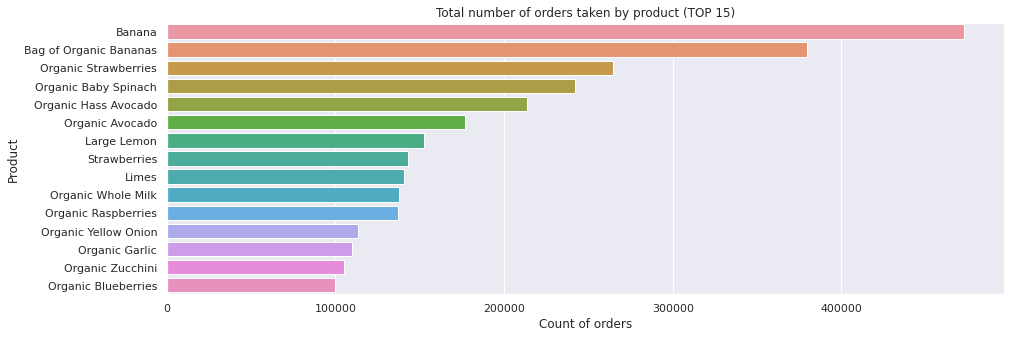

In [ ]:
sns.barplot(x=product_val_counts.values, y=product_val_counts.index)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.title("Total number of orders taken by product (TOP 15)")
plt.xlabel("Count of orders")
plt.ylabel("Product")
#plt.xticks(rotation = 45)

The above graph shows us the top 15 for most common products. Once again, we see more fresh produce that is likely to spoil quickly. These graphs will be helpful in determining if a customer will order a product. If the products is some kind of fresh produce, it is more likely something that will be reordered. 

##Classification algorithms

In [ ]:
# remove rows that contain null values
orders = orders.dropna()

In [ ]:
# merge the product data into the order data
order_data1 = pd.merge(order_products_prior, products, on='product_id')
order_data1 = pd.merge(order_data1, orders, on='order_id')
order_data1 = pd.merge(order_data1, aisles, on='aisle_id')
order_data1 = pd.merge(order_data1, departments, on='department_id')

In [ ]:
order_data1 = order_data1.sample(n=1000000)

In [ ]:
order_data1.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
department                0
dtype: int64

###Feature Engineering

In [ ]:
order_data1.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle', 'department'],
      dtype='object')

In [ ]:
#We take the top 4 department categories and make features out of them.
order_data1['isProduce'] = order_data1['department_id'].apply(lambda x: x==4).astype(int) ##Boolean feature isProduce
order_data1['isdairy'] = order_data1['department_id'].apply(lambda x: x==16).astype(int) ##Boolean feature isDairy
order_data1['issnack'] = order_data1['department_id'].apply(lambda x: x==19).astype(int) ##Boolean feature isSnack
order_data1['isbeverage'] = order_data1['department_id'].apply(lambda x: x==7).astype(int) ##Boolean feature isBeverage

In [ ]:
#Create a feature based on whether or not the product is generally spoilable or not
spoilableDepartments = ['bakery', 'produce', 'meat seafood', 'dairy eggs', 'deli']
topSpoilableAisles = ['fresh fruits',  'fresh vegetables', 'packaged vegetables fruits', 'yogurt',  'packaged cheese', 'milk', 'bread']

def spoilable(row):
  if (row['department'] in spoilableDepartments) or (row['aisle'] in topSpoilableAisles):
    return 1
  else:
    return 0

order_data1['isSpoilable'] = order_data1.apply(spoilable, axis=1)

In [ ]:
#New list of columns
order_data1.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle', 'department', 'isProduce', 'isdairy',
       'issnack', 'isbeverage', 'isSpoilable'],
      dtype='object')

###Train/Test Split

In [ ]:
# create a feature matrix with the relevant features
X = order_data1[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id', 'department_id', 'isProduce', 'isdairy',
       'issnack', 'isbeverage', 'isSpoilable']]

# create a label vector with the 'reordered' column
y = order_data1['reordered']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier
clf = RandomForestClassifier()

# train a random forest classifier
clf.fit(X_train, y_train)

# use the trained classifier to predict whether or not the customer will reorder 
reordered_items = clf.predict(X_test)

#accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.67


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create the classifier
clf_1 = GaussianNB()

# train a random forest classifier
clf_1.fit(X_train, y_train)

# use the trained classifier to predict whether or not the customer will reorder 
reordered_items_1 = clf_1.predict(X_test)

#accuracy
accuracy_1 = clf_1.score(X_test, y_test)
print(f"Model accuracy: {accuracy_1:.2f}")

Model accuracy: 0.64


### Logictic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression()

# train a Logistic Regression classifier
clf_2.fit(X_train, y_train)

# use the trained classifier to predict whether or not the customer will reorder 
reordered_items_2 = clf_2.predict(X_test)

#accuracy
accuracy_2 = clf_2.score(X_test, y_test)
print(f"Model accuracy: {accuracy_2:.2f}")

Model accuracy: 0.67


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


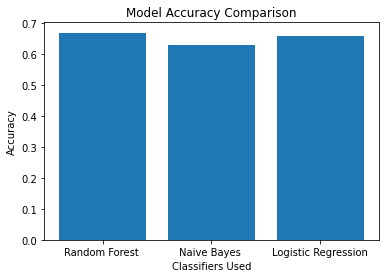

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names and accuracy scores
models = ["Random Forest ", "Naive Bayes ", "Logistic Regression"]
accuracy = [0.67, 0.63, 0.66]

# Create a bar graph using the model names and accuracy scores
plt.bar(models, accuracy)

# Add labels and a title to the graph
plt.xlabel("Classifiers Used")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Show the graph
plt.show()

##Apriori

In [14]:
merge_order_prod = pd.merge(order_products_prior, products,how='inner',on='product_id')
merge_order_prod.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


###Sampling and prepocessing

In [18]:
#Take random 10,000 orders
merge_order_prod = merge_order_prod[(merge_order_prod['order_id']>10000) & (merge_order_prod['order_id']<20000)]

In [19]:
reduced_df = merge_order_prod[['order_id','product_name']].copy()
reduced_df.rename(columns={'product_name':'product_names'}, inplace=True)
reduced_df['encode'] = 1

In [20]:
#Use unstack and fill na
final_df = reduced_df.groupby(['order_id','product_names'])['encode'].sum().unstack().fillna(0)

In [21]:
final_df.head()

product_names,#2 Coffee Filters,#2 Cone White Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Organic Greek Vanilla Yogurt,0% Fat Strawberry Greek Yogurt,0% Fat Superfruits Greek Yogurt,...,o.b Super Plus Fluid Lock Tampons,of Hanover 100 Calorie Pretzels Mini,pumpkin spice,smart Blend Chicken & Rice Formula Dry Dog Food,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
order_id,,,,,,,,,,,,,,,,,,,,,
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def encode_updater(row):
    if row >= 1 :
        return 1
    elif row <= 0:
        return 0

final_df.applymap(encode_updater)

product_names,#2 Coffee Filters,#2 Cone White Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Organic Greek Vanilla Yogurt,0% Fat Strawberry Greek Yogurt,0% Fat Superfruits Greek Yogurt,...,o.b Super Plus Fluid Lock Tampons,of Hanover 100 Calorie Pretzels Mini,pumpkin spice,smart Blend Chicken & Rice Formula Dry Dog Food,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
order_id,,,,,,,,,,,,,,,,,,,,,
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Frequent Itemsets

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
freq_itemsets = apriori(final_df, min_support=0.01, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.011514,(100% Raw Coconut Water)
1,0.020469,(100% Whole Wheat Bread)
2,0.013006,(2% Reduced Fat Milk)
3,0.025373,(Apple Honeycrisp Organic)
4,0.019190,(Asparagus)
...,...,...
114,0.017591,"(Banana, Organic Strawberries)"
115,0.010341,"(Banana, Organic Whole Milk)"
116,0.012793,"(Banana, Strawberries)"
117,0.012154,"(Organic Baby Spinach, Organic Strawberries)"


###Association Rules

In [25]:
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.1)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Organic Fuji Apple),(Banana),0.027186,0.152559,0.010341,0.380392,2.493416,0.006194,1.367706
8,(Cucumber Kirby),(Banana),0.032942,0.152559,0.011834,0.359223,2.354657,0.006808,1.322522
12,(Organic Avocado),(Banana),0.055330,0.152559,0.017804,0.321773,2.109174,0.009363,1.249495
9,(Large Lemon),(Banana),0.048081,0.152559,0.014925,0.310421,2.034767,0.007590,1.228926
4,(Organic Raspberries),(Bag of Organic Bananas),0.042857,0.118230,0.013006,0.303483,2.566877,0.007939,1.265969
20,(Strawberries),(Banana),0.044350,0.152559,0.012793,0.288462,1.890824,0.006027,1.190999
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.068550,0.118230,0.017804,0.259720,2.196731,0.009699,1.191130
14,(Organic Baby Spinach),(Banana),0.076546,0.152559,0.019723,0.257660,1.688925,0.008045,1.141581
10,(Limes),(Banana),0.044776,0.152559,0.011087,0.247619,1.623107,0.004256,1.126346
19,(Organic Whole Milk),(Banana),0.042217,0.152559,0.010341,0.244949,1.605609,0.003901,1.122364
